* [Company Summary Variables List](https://api.census.gov/data/2019/abscs/variables.html) <br/><br/>
* [Company Summary Documentation](https://www2.census.gov/programs-surveys/abs/technical-documentation/api/API2019-company-summary-1-26-2021.pdf)

In [336]:
# COMPANY SUMMARY DATA
import matplotlib.pyplot as plt
import pandas as pd

# NUMBER OF EMPLOYEES BY INDUSTRY
# MAKE SURE THERE ARE NO WHITE SPACES IN ANY VARIABLE
labels = 'EMP,NAICS2017,NAICS2017_LABEL'

data_group = '&for=us'  # FOR ENTIRE USA
# data_group = '&for=metropolitan%20statistical%20area/micropolitan%20statistical%20' # FOR METROPOLITAN AREAS
# data_group = '&for=state' # FOR STATES

# Set area = '' for USA and US STATES
# area = 'area:12060'
area = ''


NAICS2017_value = ''

API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

df = pd.read_json(f'https://api.census.gov/data/2018/abscs?get={labels}{data_group}{area}{NAICS2017_value}{API_key}')
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header
df.drop('us',axis=1,inplace=True)
df['EMP'] = df['EMP'].astype(int)
template = df.copy()
df = df.loc[df['NAICS2017']=='00']

df

,EMP,NAICS2017,NAICS2017_LABEL
1,128196406,00,Total for all sectors


In [337]:
df = template.copy()
df = df.loc[df['NAICS2017']!='00'].sort_values(by='EMP',ascending=False).head(10)
df

,EMP,NAICS2017,NAICS2017_LABEL
16,19123446,62,Health care and social assistance
7,15875876,44-45,Retail trade
18,14275081,72,Accommodation and food services
14,12694998,56,Administrative and support and waste managemen...
5,12006094,31-33,Manufacturing
12,9356647,54,"Professional, scientific, and technical services"
4,6754898,23,Construction
10,6643953,52,Finance and insurance
6,6109303,42,Wholesale trade
8,5049216,48-49,Transportation and warehousing


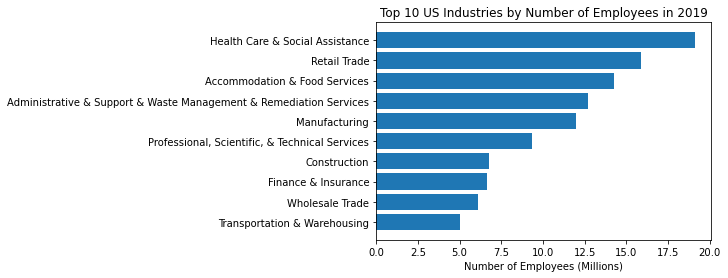

In [338]:
df = template.copy()
df = df.loc[df['NAICS2017']!='00']

df['NAICS2017_LABEL'] = df['NAICS2017_LABEL'].apply(lambda x:(x.replace('and','&')).title())
df['EMP'] = df['EMP'].apply(lambda x:float(x/1_000_000))

sorted_totals = df[['NAICS2017_LABEL','EMP']].sort_values(by = 'EMP',ascending=True)

ax = plt.barh(sorted_totals['NAICS2017_LABEL'].tail(10),sorted_totals['EMP'].tail(10));
plt.title('Top 10 US Industries by Number of Employees in 2019')
plt.xlabel('Number of Employees (Millions)');




In [339]:
labels = 'EMP,RACE_GROUP,RACE_GROUP_LABEL'

data_group = '&for=us'  # FOR ENTIRE USA

# Set area = '' for USA and US STATES
# area = 'area:12060'
area = ''

NAICS2017_value = ''

API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

df = pd.read_json(f'https://api.census.gov/data/2018/abscs?get={labels}{data_group}{area}{NAICS2017_value}{API_key}')
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header
df.drop('us',axis=1,inplace=True)
df['EMP'] = df['EMP'].astype(int)
df = df.loc[df['RACE_GROUP']!='00'].sort_values(by='EMP',ascending=False)
df = df.loc[(df['RACE_GROUP_LABEL']!='Nonminority') & (df['RACE_GROUP_LABEL']!='Minority') & (df['RACE_GROUP_LABEL']!='Equally minority/nonminority')]
df.drop('RACE_GROUP',axis=1,inplace=True)
template = df.copy()
df

,EMP,RACE_GROUP_LABEL
3,56877432,White
5,5090065,Asian
2,1188819,Black or African American
4,200256,American Indian and Alaska Native
7,54446,Native Hawaiian and Other Pacific Islander


In [340]:
labels = 'NAME,FIRMPDEMP'

# data_group = '&for=us'  # FOR ENTIRE USA
data_group = '&for=state'

# Set area = '' for USA and US STATES
# area = 'area:12060'
area = ''

NAICS2017_value = ''

API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

df = pd.read_json(f'https://api.census.gov/data/2018/abscs?get={labels}{data_group}{area}{NAICS2017_value}{API_key}')
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(int)
df = df[['NAME','FIRMPDEMP']].sort_values(by='FIRMPDEMP',ascending=False)
df.head(10)


,NAME,FIRMPDEMP
32,California,738370
37,Florida,447363
9,New York,446155
20,Texas,425425
41,Illinois,245445
15,Pennsylvania,214291
7,New Jersey,187243
38,Georgia,174985
12,Ohio,170951
10,North Carolina,167837


In [341]:
df.tail(10)

,NAME,FIRMPDEMP
40,Hawaii,23687
25,West Virginia,23369
16,Rhode Island,22900
18,South Dakota,21641
11,North Dakota,19844
34,Delaware,19663
27,Wyoming,17113
21,Vermont,16471
29,Alaska,15698
35,District of Columbia,15418


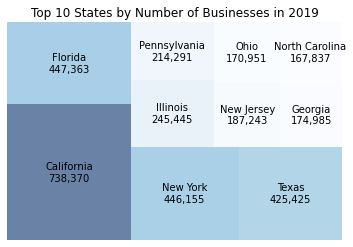

In [347]:
import matplotlib
import squarify
cmap = matplotlib.cm.Blues

minimum=min(df['FIRMPDEMP'].head(10))
maximum=max(df['FIRMPDEMP'].head(10))
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum)
labels = [f'{State}\n{"{:,}".format(count)}' for State, count in zip(df.NAME, df.FIRMPDEMP)]

colors = [cmap(norm(value)) for value in df['FIRMPDEMP'].head(10)]
squarify.plot(sizes=df['FIRMPDEMP'].head(10), label=labels, alpha=0.6, color = colors)
plt.title('Top 10 States by Number of Businesses in 2019')
plt.axis('off')
plt.show()